# Pymaceuticals Inc.
---

### Analysis

1. The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182).By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 124 female mice and 125 male mice.

2. The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_complete = pd.merge(mouse_metadata, study_results, how='right', on="Mouse ID")

# Display the data table for preview
mouse_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_number = mouse_complete["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = mouse_complete.loc[mouse_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
mice_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id_duplicate = mouse_complete.loc[mouse_complete["Mouse ID"] == "g989", :]
mouse_id_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=mouse_complete[mouse_complete['Mouse ID'].isin(mice_duplicate)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = clean_df["Mouse ID"].nunique()
clean_mice_number

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = mouse_complete.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = mouse_complete.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance = mouse_complete.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std = mouse_complete.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = mouse_complete.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
summary = pd.DataFrame({"Mean Tumor Volume": mean, 
                        "Median Tumor Volume": median, 
                        "Tumor Volume Variance": variance, 
                        "Tumor Volume Std. Dev.": std, 
                        "Tumor Volume Std. Err.": sem})
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_clean=clean_df.groupby(['Drug Regimen'])[["Tumor Volume (mm3)"]].aggregate(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_clean

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

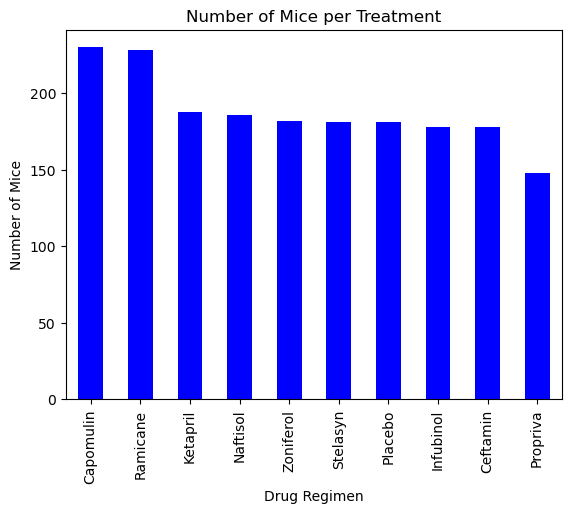

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

bar_pandas = mice_count.plot.bar(color='b',fontsize = 10)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()


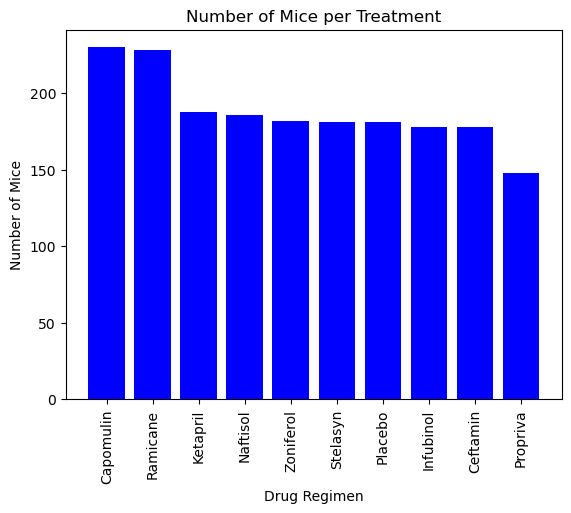

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='b')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.xticks(rotation="vertical")
plt.show()


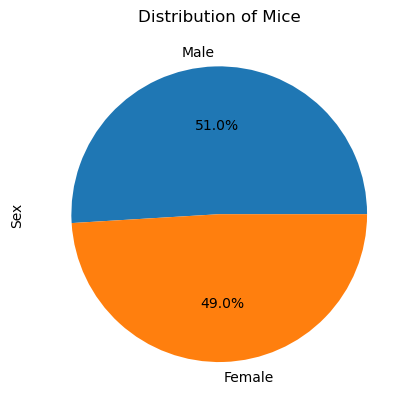

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")

plt.title("Distribution of Mice")
plt.show()

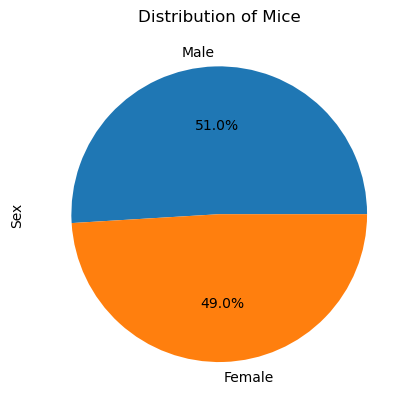

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")

plt.title('Distribution of Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_last = pd.DataFrame(mouse_complete.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'last_timepoint'})
timepoint_last

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(mouse_complete, timepoint_last, on='Mouse ID')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,last_timepoint
0,b128,Capomulin,Female,9,22,0,45.000000,0,45
1,b128,Capomulin,Female,9,22,5,45.651331,0,45
2,b128,Capomulin,Female,9,22,10,43.270852,0,45
3,b128,Capomulin,Female,9,22,15,43.784893,0,45
4,b128,Capomulin,Female,9,22,20,42.731552,0,45


In [25]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

by_mouse = mouse_complete.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()
    
merge_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(mouse_complete,on=['Mouse ID','Timepoint'],how="left") 
    
def get_outliers(treatments):
    outlier_data = merge_data.loc[merge_data["Drug Regimen"] == treatments]['Tumor Volume (mm3)']
    
    quartiles = outlier_data.quantile([.25,.5,.75])
    lowerquarter = quartiles[0.25]
    upperquarter = quartiles[0.75]
    iqr = upperquarter - lowerquarter
    lower_bound = lowerquarter - (1.5 * iqr)
    upper_bound = upperquarter + (1.5 * iqr)

    outliers = outlier_data.loc[(outlier_data < lower_bound) | (outlier_data > upper_bound)]
    print(f"{treatments}'s potential outliers:{outliers}")
    return outlier_data
    
capomulin = get_outliers("Capomulin")
ramicane = get_outliers("Ramicane")
infubinol = get_outliers("Infubinol")
ceftamin = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


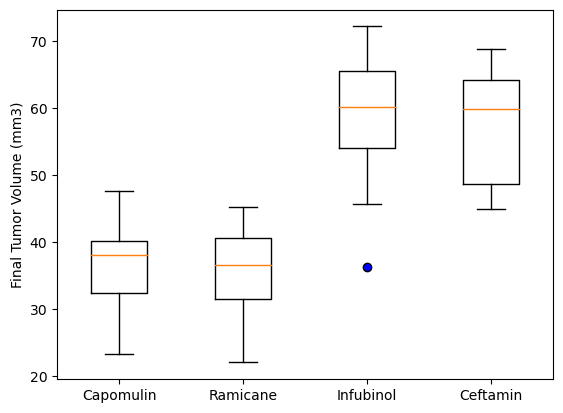

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = dict(markerfacecolor = "blue")
plt.boxplot([capomulin, ramicane, infubinol, ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= box_plot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

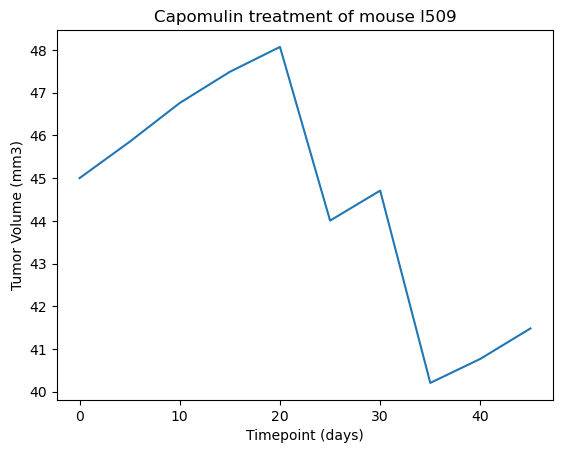

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = mouse_complete.loc[mouse_complete["Drug Regimen"] == "Capomulin",:]
capomulin_mouse_df = mouse_complete[(mouse_complete["Drug Regimen"] == "Capomulin") & (mouse_complete["Mouse ID"] == "l509")]

plt.plot(capomulin_mouse_df["Timepoint"], capomulin_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


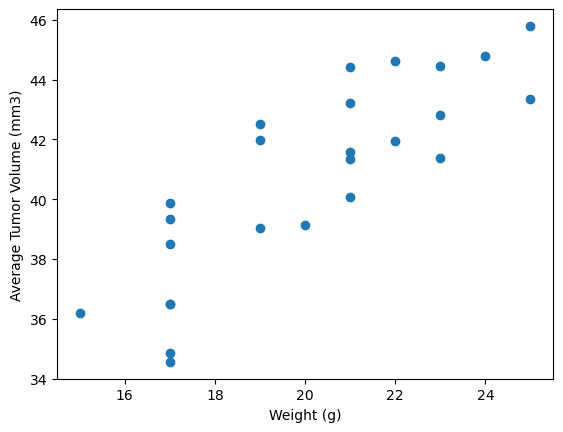

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_regimen_df["Weight (g)"], capomulin_regimen_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


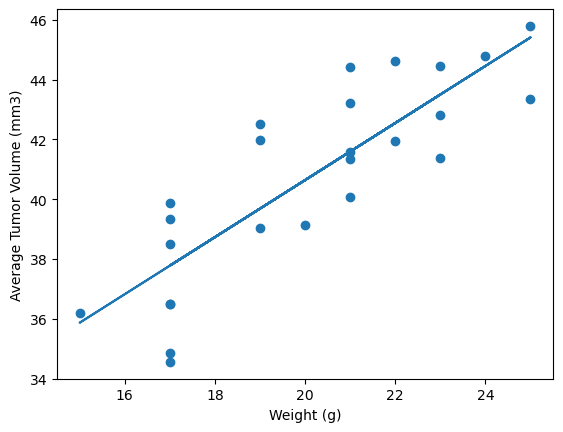

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_regimen_df["Weight (g)"], capomulin_regimen_df["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, SEM = st.linregress(capomulin_regimen_df["Weight (g)"], capomulin_regimen_df["Tumor Volume (mm3)"])

y = capomulin_regimen_df["Weight (g)"]*slope+intercept

plt.scatter(capomulin_regimen_df["Weight (g)"], capomulin_regimen_df["Tumor Volume (mm3)"])
plt.plot(capomulin_regimen_df["Weight (g)"], y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
